In [1]:
pip install pandasql


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26800 sha256=1da583a1000d298da34e17097a24a73218371f6dbea050f58fb0ffaef30d3dd0
  Stored in directory: c:\users\tarun\appdata\local\pip\cache\wheels\68\5d\a5\edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [2]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# To run sql queries on DataFrame

import pandasql as psql

In [3]:
CustChurn = pd.read_csv(r"C:\Users\tarun\Downloads\Churn_Modelling.csv",header =0)

CustChurn_BK = CustChurn.copy()
CustChurn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#count the target ordependent variable  by '0'&'1' and their proportion
#(>=10 : 1,then the dataset is imbalance data)


Exited_count = CustChurn.Exited.value_counts()
print('Class 0:',Exited_count[0])
print('Class 1:',Exited_count[1])
print('Proportion:',round(Exited_count[0]/Exited_count[1],2),': 1')
print('Total Churn MOdelling records: ',len(CustChurn))

Class 0: 7963
Class 1: 2037
Proportion: 3.91 : 1
Total Churn MOdelling records:  10000


In [7]:
#drop the variables which are not influencing on target variable

CustChurn = CustChurn.drop(['RowNumber','CustomerId','Surname'],axis=1)   #as they are not effecting the target variable

#del CustChurn['RowNumber']
#del CustChurn['CustomerId']
#del CustCHurn['Surname']

CustChurn.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [8]:
#display the geography variables count

CustChurn['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
CustChurn['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
#'map' function to convert the categorical values to numerical values

CustChurn['Geography'] = CustChurn['Geography'].map({'Spain': 0,'Germany':1,'France':2})
CustChurn['Gender'] = CustChurn['Gender'].map({'Male':0,'Female':1})

In [ ]:
# technique to convert the categorical data to numerical data

#1.Replace function
#2.map function
#3.Get dummies
#4.one hot encoding
#5.Lable encoder(more than 2 variables)
#6.Label Binarizer(only 2 variables)

In [13]:
#convert 'geography' and 'gender' to numerical formate using one hot encoding

#CustChurn = pd.get_dummies(CustChurn , columns = ['Geography','Gender'])

#Display the first five records

#CustChurn.head()

In [12]:
CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [14]:
CustChurn.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
# Identify the independent and target variables

IndepVar = []
for col in CustChurn.columns:
    if col != 'Exited':
        IndepVar.append(col)
        
TargetVar = 'Exited'

x = CustChurn[IndepVar]
y = CustChurn[TargetVar]

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 23)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [17]:
#scalling the feature by using MinMaxScalar

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range = (0,1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# Decision Tree Classifier

Confusion matrix : 
 [[ 316  293]
 [ 394 1997]]
Outcome values : 
 316 293 394 1997
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.52      0.48       609
           0       0.87      0.84      0.85      2391

    accuracy                           0.77      3000
   macro avg       0.66      0.68      0.67      3000
weighted avg       0.79      0.77      0.78      3000

Accuracy : 77.1 %
Precision : 44.5 %
Recall : 51.9 %
F1 Score : 0.479
Specificity or True Negative Rate : 83.5 %
Balanced Accuracy : 67.7 %
MCC : 0.335
roc_auc_score: 0.677


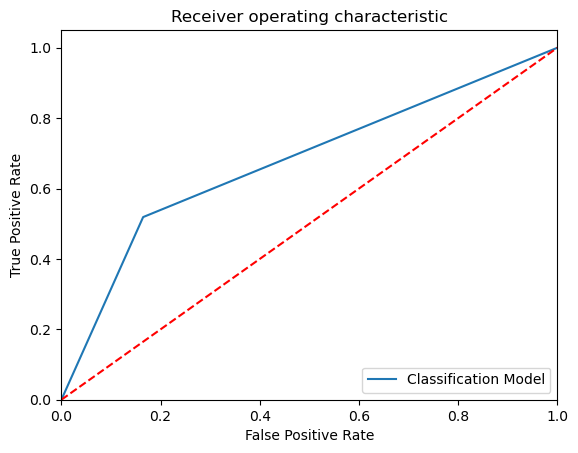

-----------------------------------------------------------------------------------------------------


In [19]:
from sklearn.tree import DecisionTreeClassifier

#create an object for model

ModelDT = DecisionTreeClassifier()

ModelDT.fit(x_train,y_train)

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [21]:
Results = pd.DataFrame({'Exited_A':y_test,'Exited_P':y_pred})

ResultsFinal = CustChurn_BK.merge(Results,left_index = True,right_index = True)

ResultsFinal.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_A,Exited_P
601,602,15645569,Mai,762,Spain,Female,26,7,123709.46,2,1,1,169654.57,0,0,0
6034,6035,15601045,Angelo,655,Spain,Male,37,8,163708.58,2,0,0,76259.23,0,0,0
4580,4581,15791842,Johnstone,478,France,Female,32,6,71187.24,1,1,1,110593.62,0,0,0
9558,9559,15801411,Green,623,Spain,Male,46,4,0.00,1,1,0,5549.11,1,1,0
4310,4311,15657881,Onyemere,784,France,Male,38,5,136712.91,1,0,1,169920.92,0,0,0
5334,5335,15813681,Zito,786,Germany,Male,24,2,120135.55,2,1,1,125449.47,0,0,0
4572,4573,15799964,Campbell,669,Germany,Female,30,7,139872.81,1,1,0,188795.85,0,0,0
9189,9190,15793723,Ch'iu,607,Germany,Male,32,9,144272.07,2,1,0,176580.63,0,0,0
5314,5315,15788068,Lopez,743,Germany,Male,45,10,144677.19,3,1,0,22512.44,1,1,1
9965,9966,15690164,Shao,627,Germany,Female,33,4,83199.05,1,0,0,159334.93,0,0,0


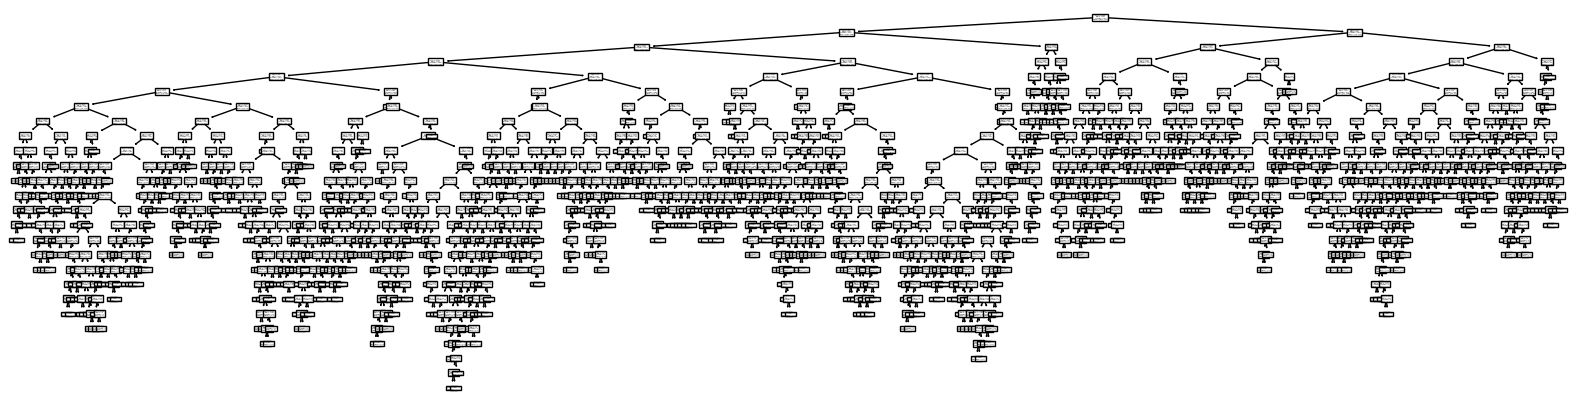

In [22]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize = (20,5))
tree.plot_tree(ModelDT);